In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals



from tensorflow.keras import datasets
import matplotlib.pyplot as plt
import pathlib
import numpy as np

In [2]:
import tensorflow as tf
tf.__version__

'1.15.0'

In [0]:
data_dir = '/content/drive/My Drive/outdoors'
data_dir= pathlib.Path(data_dir)

test_data_dir = '/content/drive/My Drive/validation'
test_data_dir = pathlib.Path(test_data_dir)


In [4]:
image_count = len(list(test_data_dir.glob('*/*.jpg')))
image_count

5000

In [0]:
BATCH_SIZE = 50
IMG_HEIGHT = 224
IMG_WIDTH = 224
# STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)
STEPS_PER_EPOCH = 100


In [0]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [53]:
test_data_gen = image_generator.flow_from_directory(directory=str(test_data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode= 'binary')


Found 5000 images belonging to 10 classes.


In [54]:
train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode= 'binary')

Found 45013 images belonging to 10 classes.


In [0]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(label_batch[n])
      plt.axis('off')

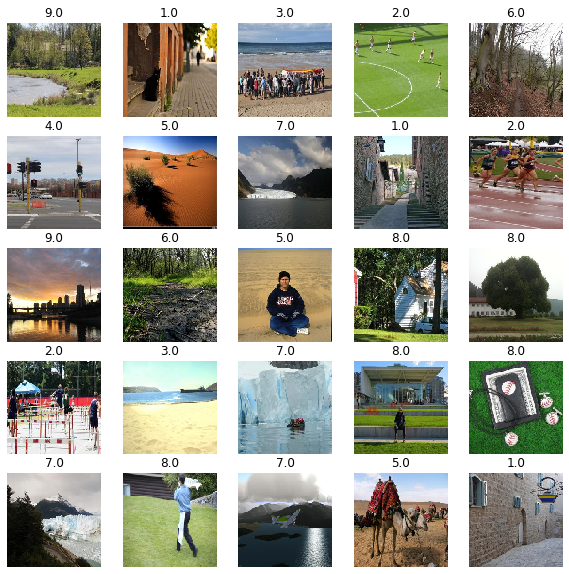

In [10]:
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

In [11]:
label_batch.shape


(50,)

In [0]:
# model = models.Sequential()

# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(10, activation='softmax'))

In [0]:
from keras.applications import VGG19


In [46]:
from keras.models       import Model
original_model = VGG19()
bottleneck_input = original_model.get_layer(index = 0).input
bottleneck_output = original_model.get_layer(index = -2).output 
bottleneck_model = Model(inputs = bottleneck_input, outputs = bottleneck_output )

574717952/574710816 [==============================] - 13s 0us/step


In [0]:
bottleneck_model.summary()


In [0]:
for layer in bottleneck_model.layers:
    layer.trainable = False

In [0]:

from keras.models       import Model
from keras.applications import VGG19
from keras.models       import Sequential
from keras.layers       import Dense, Dropout, Activation

In [0]:
new_model = Sequential()
new_model.add(bottleneck_model)
new_model.add(Dense(10, activation='softmax', input_dim=2048))

In [0]:
new_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [55]:
new_model.fit_generator(
        train_data_gen,
        steps_per_epoch= STEPS_PER_EPOCH,
        epochs=1,
        validation_data= test_data_gen,
        validation_steps= 10
        )

Epoch 1/1
100/100 [==============================] - 3484s 35s/step - loss: 1.7038 - acc: 0.4174 - val_loss: 1.3584 - val_acc: 0.5280


In [0]:
new_model.save('/content/drive/My Drive/model_VGG19') 